# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [ ]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.4 MB/s eta 0:00:00


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [ ]:
from torchvision import datasets

# Number of subprocesses to use for data loading
num_workers = 0
# Number of samples per batch to load
batch_size = 64

# Define transforms
transform = transforms.ToTensor()

# Create training set and define training dataloader
# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)

# Create test set and define test dataloader
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6064593.45it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159763.89it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1505834.20it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3380750.45it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing
**DOUBLE CLICK THIS CELL TO MODIFY**


In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

---

The preprocessing steps I chose for the MNIST dataset include converting the images to tensors.

**Converting to Tensors**: The original MNIST dataset consists of grayscale images represented as pixel values ranging from 0 to 255. To work with these images in PyTorch, it is necessary to convert them to tensors. Tensors are the primary data structure in PyTorch, allowing efficient computation on GPUs. Converting the images to tensors facilitates seamless integration with PyTorch's tensor-based operations and deep learning models.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [ ]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training data dimensions: torch.Size([60000, 28, 28])
Test data dimensions: torch.Size([10000, 28, 28])
7


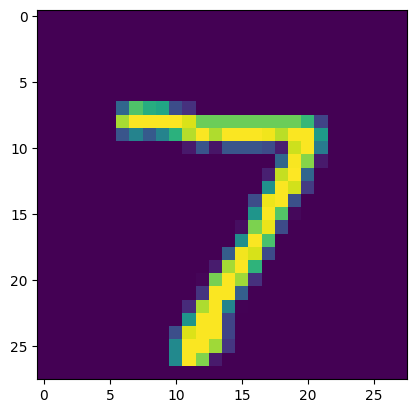

2


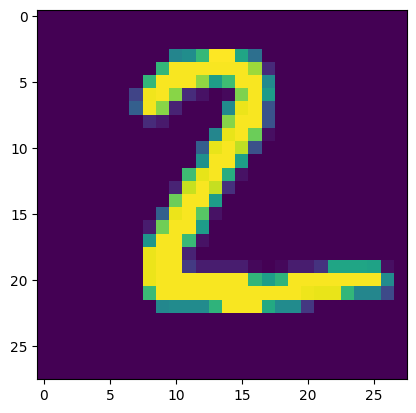

1


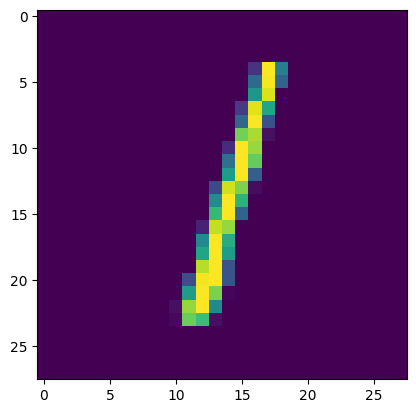

0


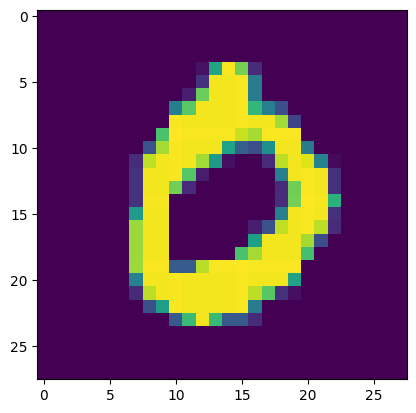

4


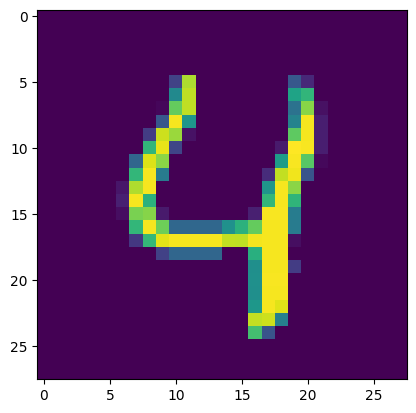

In [ ]:
# Explore data
# Dimensions of the data
print("Training data dimensions:", train_data.data.shape)
print("Test data dimensions:", test_data.data.shape)

# Show 5 images from the training set
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [ ]:
## YOUR CODE HERE ##
class CustomNetwork(nn.Module):
    """Custom neural network architecture for image classification.

    This network consists of three fully connected layers with dropout for regularization.
    The input size is expected to be 28x28 pixels.
    """

    def __init__(self):
        super(CustomNetwork, self).__init__()

        # Define the layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        """Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 10) representing class scores.
        """
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Create an instance of the network
model = CustomNetwork()
print(model)

CustomNetwork(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [ ]:
## YOUR CODE HERE ##

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [ ]:
## YOUR CODE HERE ##

# Define the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

# Training loop
num_epochs = 20
print_freq = 250
total_loss = 0
total_batches = 0
train_loss_list = []  # Initialize a list to store training loss

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Record the loss
        total_loss += loss.item()
        total_batches += 1

        # Print loss at specified intervals
        if (i + 1) % print_freq == 0:
            avg_loss = total_loss / total_batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {avg_loss:.4f}")
            total_loss = 0
            total_batches = 0

            train_loss_list.append(avg_loss)  # Append the training loss to the list

print("Training completed!")

Epoch [1/20], Batch [250/938], Loss: 1.0921
Epoch [1/20], Batch [500/938], Loss: 0.3806
Epoch [1/20], Batch [750/938], Loss: 0.3149
Epoch [2/20], Batch [250/938], Loss: 0.2330
Epoch [2/20], Batch [500/938], Loss: 0.1924
Epoch [2/20], Batch [750/938], Loss: 0.1837
Epoch [3/20], Batch [250/938], Loss: 0.1461
Epoch [3/20], Batch [500/938], Loss: 0.1363
Epoch [3/20], Batch [750/938], Loss: 0.1339
Epoch [4/20], Batch [250/938], Loss: 0.1101
Epoch [4/20], Batch [500/938], Loss: 0.1040
Epoch [4/20], Batch [750/938], Loss: 0.1044
Epoch [5/20], Batch [250/938], Loss: 0.0864
Epoch [5/20], Batch [500/938], Loss: 0.0838
Epoch [5/20], Batch [750/938], Loss: 0.0840
Epoch [6/20], Batch [250/938], Loss: 0.0719
Epoch [6/20], Batch [500/938], Loss: 0.0689
Epoch [6/20], Batch [750/938], Loss: 0.0744
Epoch [7/20], Batch [250/938], Loss: 0.0610
Epoch [7/20], Batch [500/938], Loss: 0.0590
Epoch [7/20], Batch [750/938], Loss: 0.0631
Epoch [8/20], Batch [250/938], Loss: 0.0526
Epoch [8/20], Batch [500/938], L

Plot the training loss (and validation loss/accuracy, if recorded).

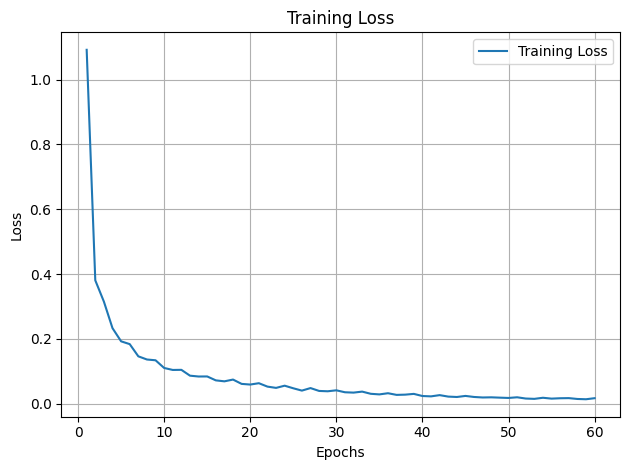

In [ ]:
## YOUR CODE HERE ##

# Plotting the training loss
epochs = range(1, len(train_loss_list) + 1)  # Use the length of train_loss_list for the range

plt.plot(epochs, train_loss_list, label='Training Loss')  # Plot the training loss values
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.title('Training Loss')  # Set the title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Display grid lines
plt.tight_layout()  # Adjust the spacing of the plot
plt.show()  # Show the plot

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
## YOUR CODE HERE ##

# Initialize variables to monitor test loss and accuracy
test_loss = 0.0
correct = 0
total = 0
class_correct = [0] * 10
class_total = [0] * 10

model.eval()  # Set the model to evaluation mode

# Disable gradient calculation and enable faster computation
with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)

        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)

        # Calculate the loss
        loss = criterion(output, target)

        # Update test loss
        test_loss += loss.item() * data.size(0)

        # Convert output probabilities to predicted class
        _, predicted = torch.max(output, 1)

        # Update total examples and correct predictions
        total += target.size(0)
        correct += (predicted == target).sum().item()

        # Calculate test accuracy for each object class
        for i in range(target.size(0)):
            label = target[i]
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1

# Calculate and print average test loss
test_loss /= total
print(f"Test Loss: {test_loss:.6f}\n")

# Print test accuracy for each object class
for i in range(10):
    if class_total[i] > 0:
        accuracy = 100 * class_correct[i] / class_total[i]
        print(f"Test Accuracy of {i}: {accuracy:.2f}% ({class_correct[i]}/{class_total[i]})")
    else:
        print(f"Test Accuracy of {i}: N/A (no training examples)")

# Print overall test accuracy
overall_accuracy = 100 * correct / total
print(f"\nTest Accuracy (Overall): {overall_accuracy:.2f}% ({correct}/{total})")

Test Loss: 0.059290

Test Accuracy of 0: 99.49% (975/980)
Test Accuracy of 1: 99.47% (1129/1135)
Test Accuracy of 2: 97.97% (1011/1032)
Test Accuracy of 3: 98.12% (991/1010)
Test Accuracy of 4: 98.27% (965/982)
Test Accuracy of 5: 98.88% (882/892)
Test Accuracy of 6: 98.12% (940/958)
Test Accuracy of 7: 97.76% (1005/1028)
Test Accuracy of 8: 97.43% (949/974)
Test Accuracy of 9: 97.72% (986/1009)

Test Accuracy (Overall): 98.33% (9833/10000)


## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
# Specify the file path for saving the model
model_path = 'model_1.pt'

# Save the model state dictionary and other necessary information
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss_list': train_loss_list
}, model_path)

print("Model saved successfully.")

Model saved successfully.


## Visualizes sample test results with predicted labels and ground-truth labels.

In [ ]:
import matplotlib.pyplot as plt

def visualize_sample_results(model, test_loader, device):
    """
    Visualizes sample test results with predicted labels and ground-truth labels.

    Args:
        model (nn.Module): The trained model.
        test_loader (DataLoader): DataLoader for the test dataset.
        device (torch.device): Device (GPU or CPU) to use for inference.

    Returns:
        None
    """

    # Set the model to evaluation mode
    model.eval()

    # Initialize the figure
    fig = plt.figure(figsize=(12, 8))

    # Iterate over the test dataset
    for i, (inputs, labels) in enumerate(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Convert to numpy arrays
        inputs = inputs.cpu().numpy()
        preds = preds.cpu().numpy()
        labels = labels.cpu().numpy()

        # Plot the images
        for j in range(15):
            ax = plt.subplot(3, 5, j + 1)
            ax.axis("off")
            ax.imshow(inputs[j].squeeze(), cmap="gray")

            # Set the label color based on the prediction accuracy
            if preds[j] == labels[j]:
                label_color = "red"
            else:
                label_color = "black"

            ax.set_title(f"{preds[j]} ({labels[j]})", color=label_color)

        # Break after displaying 20 images
        if i == 3:
            break

    plt.tight_layout()
    plt.show()

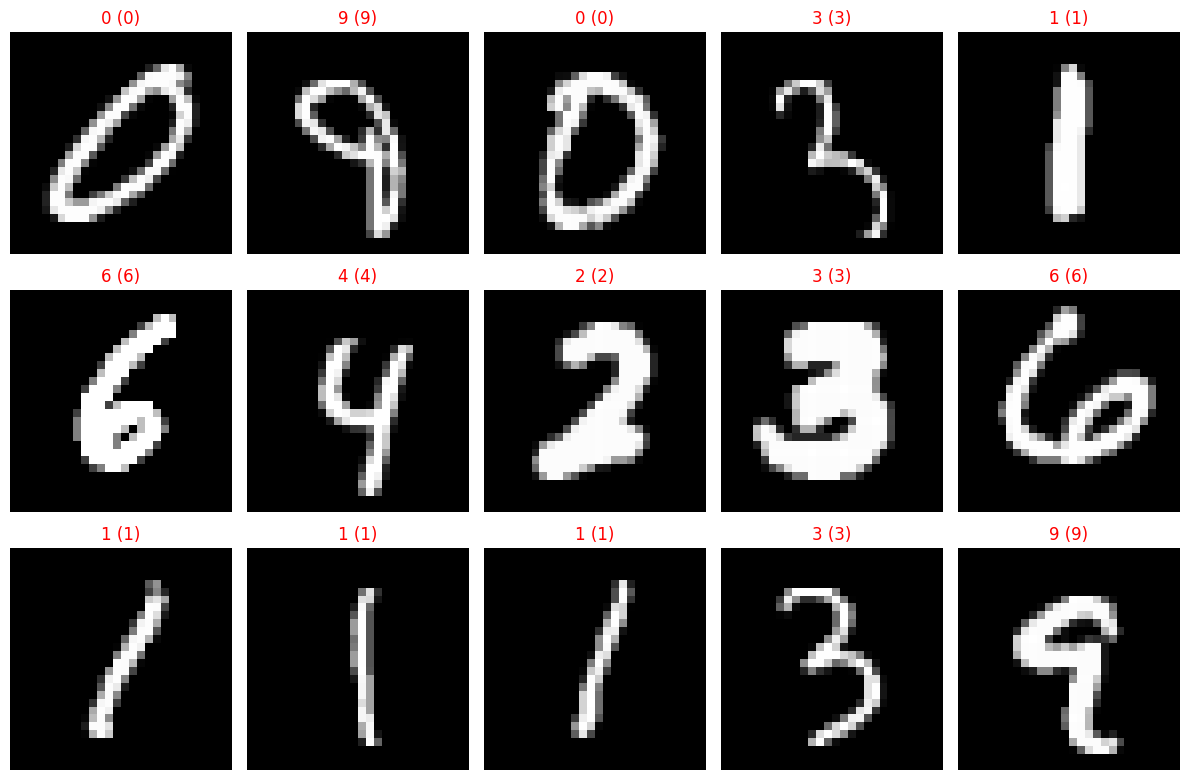

In [ ]:
visualize_sample_results(model, test_loader, device)

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

# Apply the transformation to the dataset
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

In this upgraded architecture, I have replaced the fully connected layers with convolutional layers to leverage the spatial information in the images. The model consists of three convolutional layers with increasing depth, followed by max pooling layers to downsample the feature maps. The output of the convolutional layers is flattened and passed through fully connected layers to perform classification. Dropout layers are added for regularization. These modifications allow the model to capture more complex patterns and improve performance and accuracy on image classification tasks.

In [ ]:
class CustomNetwork(nn.Module):
    """Custom neural network architecture for image classification.

    This network consists of multiple convolutional layers followed by fully connected layers.
    The input size is expected to be 28x28 pixels.
    """

    def __init__(self):
        super(CustomNetwork, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        # Max pooling layer
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 512)  # Adjust the input size here
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        """Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 10) representing class scores.
        """
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Reshape to (batch_size, num_features)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Create an instance of the network
model = CustomNetwork()
print(model)

CustomNetwork(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
# Define the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
print_freq = 250
total_loss = 0
total_batches = 0
train_loss_list = []  # Initialize a list to store training loss

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Record the loss
        total_loss += loss.item()
        total_batches += 1

        # Print loss at specified intervals
        if (i + 1) % print_freq == 0:
            avg_loss = total_loss / total_batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {avg_loss:.4f}")
            total_loss = 0
            total_batches = 0

    # Calculate average epoch loss
    avg_epoch_loss = total_loss / total_batches
    train_loss_list.append(avg_epoch_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Average Loss: {avg_epoch_loss:.4f}")

print("Training completed!")

Epoch [1/20], Batch [250/938], Loss: 2.3033
Epoch [1/20], Batch [500/938], Loss: 2.2986
Epoch [1/20], Batch [750/938], Loss: 2.2938
Epoch [1/20], Average Loss: 2.2865
Epoch [2/20], Batch [250/938], Loss: 2.2761
Epoch [2/20], Batch [500/938], Loss: 2.1673
Epoch [2/20], Batch [750/938], Loss: 1.5459
Epoch [2/20], Average Loss: 0.9527
Epoch [3/20], Batch [250/938], Loss: 0.8307
Epoch [3/20], Batch [500/938], Loss: 0.5754
Epoch [3/20], Batch [750/938], Loss: 0.4533
Epoch [3/20], Average Loss: 0.3552
Epoch [4/20], Batch [250/938], Loss: 0.3403
Epoch [4/20], Batch [500/938], Loss: 0.2866
Epoch [4/20], Batch [750/938], Loss: 0.2576
Epoch [4/20], Average Loss: 0.2166
Epoch [5/20], Batch [250/938], Loss: 0.2134
Epoch [5/20], Batch [500/938], Loss: 0.1963
Epoch [5/20], Batch [750/938], Loss: 0.1836
Epoch [5/20], Average Loss: 0.1662
Epoch [6/20], Batch [250/938], Loss: 0.1689
Epoch [6/20], Batch [500/938], Loss: 0.1554
Epoch [6/20], Batch [750/938], Loss: 0.1505
Epoch [6/20], Average Loss: 0.127

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
## YOUR CODE HERE ##

# Initialize variables to monitor test loss and accuracy
test_loss = 0.0
correct = 0
total = 0
class_correct = [0] * 10
class_total = [0] * 10

model.eval()  # Set the model to evaluation mode

# Disable gradient calculation and enable faster computation
with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)

        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)

        # Calculate the loss
        loss = criterion(output, target)

        # Update test loss
        test_loss += loss.item() * data.size(0)

        # Convert output probabilities to predicted class
        _, predicted = torch.max(output, 1)

        # Update total examples and correct predictions
        total += target.size(0)
        correct += (predicted == target).sum().item()

        # Calculate test accuracy for each object class
        for i in range(target.size(0)):
            label = target[i]
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1

# Calculate and print average test loss
test_loss /= total
print(f"Test Loss: {test_loss:.6f}\n")

# Print test accuracy for each object class
for i in range(10):
    if class_total[i] > 0:
        accuracy = 100 * class_correct[i] / class_total[i]
        print(f"Test Accuracy of {i}: {accuracy:.2f}% ({class_correct[i]}/{class_total[i]})")
    else:
        print(f"Test Accuracy of {i}: N/A (no training examples)")

# Print overall test accuracy
overall_accuracy = 100 * correct / total
print(f"\nTest Accuracy (Overall): {overall_accuracy:.2f}% ({correct}/{total})")

Test Loss: 0.033809

Test Accuracy of 0: 99.39% (974/980)
Test Accuracy of 1: 99.65% (1131/1135)
Test Accuracy of 2: 98.93% (1021/1032)
Test Accuracy of 3: 99.11% (1001/1010)
Test Accuracy of 4: 99.08% (973/982)
Test Accuracy of 5: 99.10% (884/892)
Test Accuracy of 6: 97.60% (935/958)
Test Accuracy of 7: 98.05% (1008/1028)
Test Accuracy of 8: 98.67% (961/974)
Test Accuracy of 9: 98.41% (993/1009)

Test Accuracy (Overall): 98.81% (9881/10000)


## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##

# Specify the file path for saving the model
model_path = 'model.pt'

# Save the model state dictionary and other necessary information
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss_list': train_loss_list
}, model_path)

print("Model saved successfully.")

Model saved successfully.
